# Lesson 1 - Problem Set

Please solve the questions in this notebook and submit the completed notebook. The timestamp of submission will be considered the timestamp of completion.

1. What is the Central Limit Theorem? $_{5\text{pts}}$

2. Suppose I sell Banh Mi, and the probability that I will receive a customer in any given hour is modeled by the data in `customer_pmf`. Write a python function which shows how the CLT arises from the provided distribution.

3. Let's assume that `voter_age_country` contains age data for the entire country of Thailand, and `voter_age_province` contains age data for the province of Amnat Charoen, which is the second most populous province in Thailand. You work for a political firm which is trying to determine voter turn out in Amnat Charoen. In order to more effectively target your advertising dollars, you decide to see analyze the average age of voters in Shanta. Thus you decide to test whether the average age of voters in Amnat Charoen differs from the average age of voters in the entire population of Thailand.
> Using the Hypothesis Testing methodology outlined during class, determine whether the average age of voters in Amnat Charoen differs from the entire population. $_{20\text{pts}}$

In [108]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
#### Problem 2 data ###
customer_pmf = np.random.poisson(12, size=50000)

#### Problem 3 data ####
voter_age_country = np.concatenate([np.random.poisson(35,size=15000),np.random.poisson(10,size=10000)])
voter_age_province = np.concatenate([np.random.poisson(30,size=30),np.random.poisson(10,size=20)])

# Q1
The central limit theorem states that if we have a distribution with any shape and we sample from this distribution and calculate the mean of this sample, then if we repeat this process many times, then the distribution of the means will have a normal distribution. The mean of this normal distribution will be equal to the mean of the initial distribution (by the law of large numbers), and the standard deviation of the normal distribution will be equal to the standard deviation of the initial distribution divided by the square root of the size of the samples we take.

# Q2

Difference in means is -0.00027850000000206876
Difference in standard deviation from the limit of the standard deviations is 0.0007692037509372529


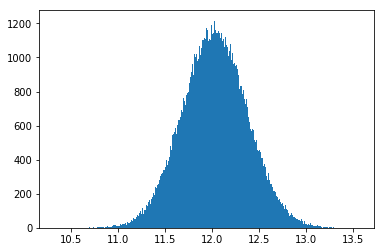

In [36]:
num_samps = 100000
samp_size = 100
means = []

for i in range(num_samps):
    sample = np.random.choice(customer_pmf, size = samp_size)
    means.append(np.mean(sample))
    
    
plt.hist(means, bins = np.arange(np.min(means), np.max(means), 1/samp_size))

print("Difference in means is", np.mean(means) - np.mean(customer_pmf))
print("Difference in standard deviation from the limit of the standard deviations is", 
      np.std(means) - np.std(customer_pmf) / np.sqrt(samp_size))


# Q3

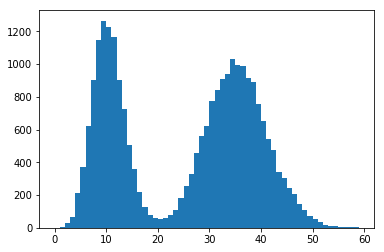

In [178]:
plt.hist(voter_age_country, bins = np.arange(0,60,1));

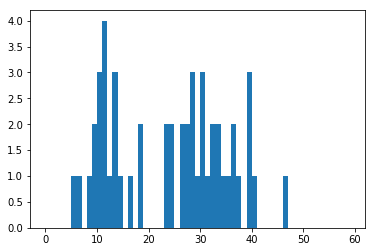

In [179]:
plt.hist(voter_age_province, bins = np.arange(0,60,1));

1) Null hypothesis: The mean of the country and province data are the same
   Alternative hypothesis: The mean of the country and province data are not the same

2) The distributions are not normal, so use the central limit theorem to test if the means are the same using the t-test.

3) Choose a 0.05 level of significance to reject the null hypothesis.

4) We will use the t-test to assess whether the means are the same or not.

In [92]:
# write a function to output the distribution of sampled means of a distribution
# given the distribution in question, the number of samples to take and the sample size

def clt_means(num_samples, samp_size, init_dist):
    means = []

    for i in range(num_samples):
        sample = np.random.choice(init_dist, size = samp_size)
        means.append(np.mean(sample))
    
    return(means);

In [174]:
# generate distributions of the means for the country and province data

voter_age_country_clt = clt_means(num_samples=10000, samp_size = 50, init_dist= voter_age_country)
voter_age_province_clt = clt_means(num_samples=10000, samp_size = 50, init_dist= voter_age_province)

In [175]:
print(np.std(voter_age_province_clt))
print(np.std(voter_age_country_clt))

print(np.mean(voter_age_province_clt))
print(np.mean(voter_age_country_clt))

1.560434528424695
1.8608551568770741
23.45645
24.974318


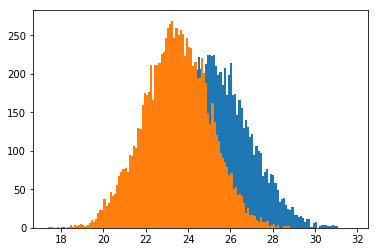

In [176]:
# plot the distributions

plt.hist(voter_age_country_clt, bins = np.arange(np.min(voter_age_country_clt), np.max(voter_age_country_clt), 0.1));
plt.hist(voter_age_province_clt, bins = np.arange(np.min(voter_age_province_clt), np.max(voter_age_province_clt), 0.1));

In [177]:
from scipy import stats

# run the t-test
stats.ttest_ind(voter_age_country_clt, voter_age_province_clt, equal_var= False)

Ttest_indResult(statistic=62.49849475831103, pvalue=0.0)

The t-test produces a p-value well below the level of significance (effectively 0), so we reject the null hypothesis and conclude that the distributions have different means.